In [152]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras import regularizers as kr
from keras.utils import to_categorical
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
from tensorflow.python.keras.callbacks import EarlyStopping

In [161]:
# Note: Need to use the Keras_test kernel (on dobro), which has keras etc. installs
model = Sequential()
nfilt = 1
filtlength = 4
seqlen = 200;
model.add(Conv1D(filters=nfilt, kernel_size=filtlength,kernel_initializer = 'ones',
                 input_shape=(seqlen,4), activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dense(1, kernel_initializer='ones' ,activation='sigmoid'))
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()
model0 = model

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_42 (Conv1D)           (None, 197, 1)            17        
_________________________________________________________________
global_average_pooling1d_42  (None, 1)                 0         
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 2         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [162]:
nseqs = 64*1024
# seqs = randseq(nseqs*seqlen).reshape(nseqs,seqlen)
acgt = 'ACGT';
# acgt_to_int = dict((c,i) for i,c in enumerate(acgt))

seqs_ind = np.random.randint(0,4,(nseqs,seqlen))
seqs_onehot = to_categorical(seqs_ind)
seqs = []
for i,x in enumerate(seqs_ind):
    seqs.append(''.join([acgt[xi] for xi in x]))
# seqs_onehot = np.zeros((nseqs,seqlen,4))
# for i in range(nseqs):
#     for j in range(seqlen):
#         x = seqs[i,j]
#         seqs_onehot[i,j,acgt_to_int[x]] = 1
        
targetseq = 'CACTA' # Any sequence that contains this fragment will be methylated
methylation = np.zeros(nseqs)
for i, seq in enumerate(seqs):
    x = seq.find(targetseq)
    if x>0:
        methylation[i] = 1
np.mean(methylation)

0.1705780029296875

In [163]:
# Train the model, iterating on the data in batches of 32 samples
# model = model0
callbacks = [EarlyStopping(monitor='val_loss', patience=10,mode = 'min')]
history = (model.fit(seqs_onehot, methylation, validation_split=0.25,callbacks=callbacks,
                    epochs=100, verbose=1, shuffle=False))
# pred = model.predict(seqs_onehot)

Train on 49152 samples, validate on 16384 samples
Epoch 1/100
49152/49152 [==============================] - 9s 184us/step - loss: 0.9303 - acc: 0.5864 - val_loss: 0.4575 - val_acc: 0.8331
Epoch 2/100
49152/49152 [==============================] - 8s 156us/step - loss: 0.4597 - acc: 0.8282 - val_loss: 0.4511 - val_acc: 0.8331
Epoch 3/100
49152/49152 [==============================] - 8s 156us/step - loss: 0.4588 - acc: 0.8282 - val_loss: 0.4510 - val_acc: 0.8331
Epoch 4/100
49152/49152 [==============================] - 8s 158us/step - loss: 0.4588 - acc: 0.8282 - val_loss: 0.4510 - val_acc: 0.8331
Epoch 5/100
49152/49152 [==============================] - 8s 156us/step - loss: 0.4588 - acc: 0.8282 - val_loss: 0.4510 - val_acc: 0.8331
Epoch 6/100
49152/49152 [==============================] - 8s 159us/step - loss: 0.4588 - acc: 0.8282 - val_loss: 0.4510 - val_acc: 0.8331
Epoch 7/100
49152/49152 [==============================] - 8s 158us/step - loss: 0.4588 - acc: 0.8282 - val_loss: 0.

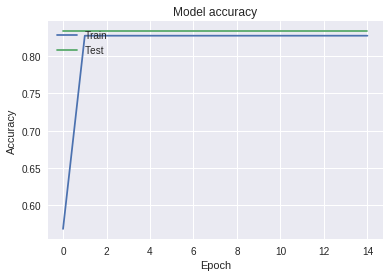

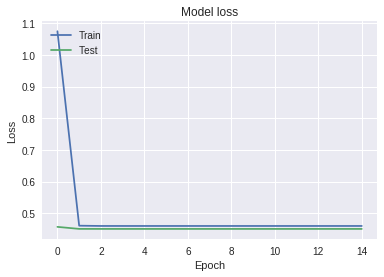

In [156]:
# history = model.fit(x, y, validation_split=0.25, epochs=50, batch_size=16, verbose=1)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


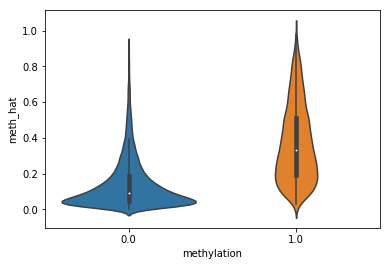

In [50]:
df = pd.DataFrame(data = {'methylation': methylation})
# df.add(seqs_onehot)
df['seqs'] = seqs
df['meth_hat'] = model.predict(seqs_onehot)
# df.boxplot(column='meth_hat', by='methylation')
ax = sns.violinplot(x="methylation", y="meth_hat", data=df)

In [60]:
# ?model.get_layer
model.get_layer(index=0).ipynb_checkpoints/

In [105]:
seqs_onehot.shape

(65536, 40, 4)

In [107]:
seqs_onehot[0]

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]],